## Регрессия | Programming Assignment 

Работа с данными опроса 4361 женщин из Ботсваны

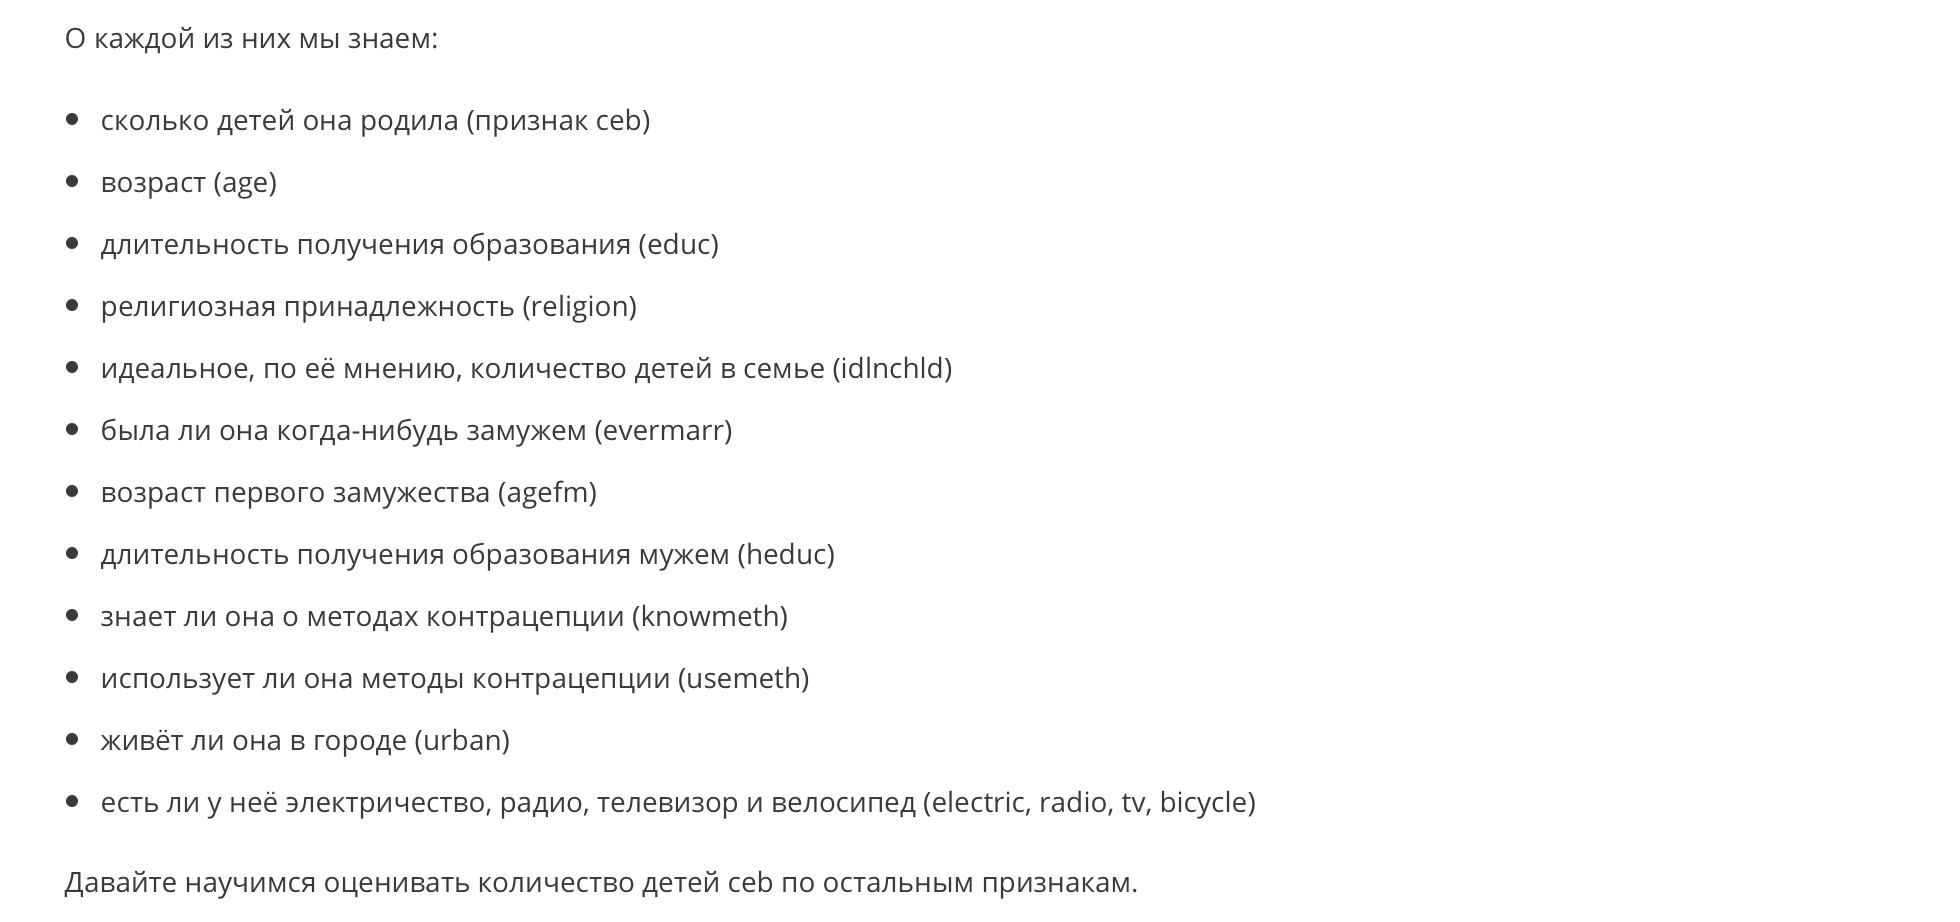

In [3]:
import pandas as pd

In [4]:
raw = pd.read_csv("botswana.tsv", sep="\t", index_col=False) 
raw.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


1. Загрузите данные и внимательно изучите их. Сколько разных значений принимает признак religion?

In [5]:
raw.religion.value_counts()

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64

2. Во многих признаках есть пропущенные значения. Сколько объектов из 4361 останется, если выбросить все, содержащие пропуски? 

In [6]:
raw.shape

(4361, 15)

In [7]:
(raw.dropna()).shape

(1834, 15)

3. В разных признаках пропуски возникают по разным причинам и должны обрабатываться по-разному. Создайте признак nevermarr, равный единице там, где в agefm пропуски.Удалите признак evermarr — в сумме с nevermarr он даёт константу, значит, в нашей матрице X будет мультиколлинеарность. Замените NaN в признаке agefm на 0.У объектов, где nevermarr = 1, замените NaN в признаке heduc на 1, остальные на -1.


In [8]:
raw['nevermarr'] = raw.agefm.fillna(1)

In [9]:
raw.nevermarr

0        1.0
1       20.0
2       22.0
3        1.0
4       24.0
        ... 
4356     1.0
4357     1.0
4358     1.0
4359    22.0
4360    21.0
Name: nevermarr, Length: 4361, dtype: float64

In [10]:
raw = raw.drop(["evermarr"], axis=1)

In [11]:
raw.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,20.0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,22.0
3,0,24,12,other,2.0,1.0,0.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,24.0


In [12]:
raw.agefm = raw.agefm.fillna(0)

In [13]:
raw[(raw.nevermarr == 1)] = raw[(raw.nevermarr == 1)].fillna(-1)

In [14]:
((raw.heduc).isna()).value_counts()

False    4238
True      123
Name: heduc, dtype: int64

4. Избавимся от оставшихся пропусков. Для признаков idlnchld, heduc и usemeth проведите операцию, аналогичную предыдущей: создайте индикаторы пропусков по этим признакам (idlnchld_noans, heduc_noans, usemeth_noans), замените пропуски на нехарактерные значения (cidlnchld=−1, cheduc2=−2 (значение -1 мы уже использовали), cusemeth=−1).
    Остались только пропуски в признаках knowmeth, electric, radio, tv и bicycle. Их очень мало, так что удалите объекты, на которых их значения пропущены.
    Какого размера теперь наша матрица данных? Умножьте количество строк на количество всех столбцов (включая отклик ceb).

In [16]:
raw['idlnchld_noans'] = 0
raw.loc[raw.idlnchld.isnull(), 'idlnchld_noans'] = 1

raw['heduc_noans'] = 0
raw.loc[raw.heduc.isnull(), 'heduc_noans'] = 1

raw['usemeth_noans'] = 0
raw.loc[raw.usemeth.isnull(), 'usemeth_noans'] = 1

raw.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1.0,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,20.0,0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,22.0,0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1.0,0,0,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,24.0,0,0,0


In [17]:
raw.idlnchld[raw.idlnchld.isnull()] = -1
raw.heduc[raw.heduc.isnull()] = -2
raw.usemeth[raw.usemeth.isnull()] = -1
raw = raw.dropna()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [18]:
raw.shape[0] * raw.shape[1]

78336

5. Постройте регрессию количества детей ceb на все имеющиеся признаки методом smf.ols, как в разобранном до этого примере. Какой получился коэффициент детерминации R2? Округлите до трёх знаков после десятичной точки.

In [20]:
formula = 'ceb ~ ' + ' + '.join(raw.columns[1:])

In [21]:
formula

'ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans'

In [23]:
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [24]:
reg_m = smf.ols(formula, data=raw)
fitted_m = reg_m.fit()
print(fitted_m.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     412.2
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:12:28   Log-Likelihood:                -7740.8
No. Observations:                4352   AIC:                         1.552e+04
Df Residuals:                    4332   BIC:                         1.565e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

6. Проверьте критерием Бройша-Пагана гомоскедастичность ошибки в построенной модели. Выполняется ли она? Если ошибка гетероскедастична, перенастройте модель, сделав поправку Уайта типа HC1.

In [25]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted_m.resid, fitted_m.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [27]:
# ошибка гомоскедастична
reg_2 = smf.ols(formula, data=raw)
fitted_2 = reg_2.fit(cov_type='HC1')
print(fitted_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     341.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:15:23   Log-Likelihood:                -7740.8
No. Observations:                4352   AIC:                         1.552e+04
Df Residuals:                    4332   BIC:                         1.565e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1